In [1]:
import sys
sys.path.append('..')   

from app.data import dataset
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
#explain dataframe
TVTROPES_DATA_FOLDER_PATH = Path("..","data", "tvtropes")
tropes = dataset.TVTropesDataset.from_csv_files(TVTROPES_DATA_FOLDER_PATH)


In [17]:
print(len(tropes.lit_tropes.index), len(tropes.lit_goodreads_match.index))
df = tropes.lit_goodreads_match
# filter on example column where character length of example string is less than 50.
df["word_count"] = df["Example"].str.split(" ").str.len()
print(df.describe())
filtered_df = df[df["word_count"] > 20]

print(len(filtered_df.index))

679618 360108
          Unnamed: 0     word_count
count  360108.000000  360108.000000
mean   180053.500000      64.337060
std    103954.369706      85.120512
min         0.000000       1.000000
25%     90026.750000      23.000000
50%    180053.500000      43.000000
75%    270080.250000      75.000000
max    360107.000000    5871.000000
284287


In [21]:
len(tropes.lit_tropes["Example"])

679618

In [10]:
df = tropes.tropes
df["word_count"] = df["Description"].str.split(" ").str.len()
df.describe()


,Unnamed: 0,word_count
count,30984.000000,30960.000000
mean,15491.500000,272.872351
std,8944.454707,193.769546
min,0.000000,1.000000
25%,7745.750000,147.000000
50%,15491.500000,227.000000
75%,23237.250000,346.000000
max,30983.000000,4684.000000


In [3]:
samples = tropes.get_split_for_n_examples_k_classes(100, 5)
print(samples["trope_id"].value_counts())



trope_id
t05425    20
t15448    20
t03268    20
t21113    20
t08092    20
Name: count, dtype: int64


In [5]:
samples.to_csv(tropes.path/"100_5_split.csv")

In [4]:
# statistics about Example column text data (avg number of chars etc.)
tropes.lit_tropes["Example"].describe()

count                                                662150
unique                                               554323
top        Fighting Fantasy, a wildly popular British se...
freq                                                     68
Name: Example, dtype: object

In [6]:
tropes.lit_tropes["Example"].value_counts()

Example
Fighting Fantasy, a wildly popular British series that includes simple Tabletop RPG elements, with dice as randomizers.\n The Warlock of Firetop Mountain by Steve Jackson and Ian Livingstone, the first installment and the one that started it all.\n The Citadel of Chaos by Steve Jackson, second installment of the series.\n The Forest of Doom by Ian Livingstone, third installment of the series.\n Starship Traveller by Steve Jackson, fourth installment of the series and first foray into Sci-Fi, heavily inspired by Star Trek.\n City of Thieves by Ian Livingstone, 5th installment of the series.\n Deathtrap Dungeon by Ian Livingstone, 6th installment of the series.\n Island of the Lizard King by Ian Livingstone, 7th installment of the series.\n Scorpion Swamp by Steve Jackson,noteNot the same Jackson who co-wrote Firetop Mountain and wrote Citadel, but the US game developer 8th installment of the series. Features unusual, multiple alignment-based paths and endings.\n Caverns of the S

In [7]:
# check sample of non unique rows
tropes.lit_tropes.nunique()

Unnamed: 0    679618
Title          15495
Trope          27229
Example       554323
trope_id       27229
title_id       15495
dtype: int64

In [12]:
# check sample of unique rows
unique_lit_tropes_texts = tropes.lit_tropes["Example"].unique()
print(unique_lit_tropes_texts[5:10])
print(unique_lit_tropes_texts.shape)

[' When Tyler is explaining to  Kelley  how   Mr. Click died , she says, "Are you kidding me?", "Are you serious?", and "You can\'t be serious! Are you kidding me?".'
 ' Implied by the cab driver in A Bad Day For Voodoo. When Tyler is in the cab, he tells the cab driver that he needs to borrow his phone to call his mom, and when he hands him the phone, he jokes that shes probably already in his contacts list.\n'
 ' In A Bad Day For Voodoo,  Esmeralda, the maker of the voodoo dolls, explains to Tyler and Kelley that Adam is this, and will one day defeat the hobgoblins. When Kelley questions this, she explains that only the chosen one could have made the voodoo dolls so powerful.\n'
 ' After  Mr. Click\'s  leg comes off, Tyler and Adam go to Tyler\'s house to watch the news, and the reporter announces that   Mr. Click is dead . Adam shouts, "No!".'
 ' Mr. Click. He gives  Tyler  an undeserved F, and announces to the entire class when a kid gets a bad grade.']
(554324,)


In [3]:
#checking if subsets
# Check if lit_goodreads_match is a subset of lit_tropes
lit_goodreads_match_subset = tropes.lit_goodreads_match[['trope_id', 'title_id']].merge(tropes.lit_tropes[['trope_id', 'title_id']], how='left', indicator=True)
print("Is lit_goodreads_match a subset of lit_tropes?")
print(lit_goodreads_match_subset['_merge'].eq('both').all())

# Check if film_imdb_match is a subset of film_tropes
film_imdb_match_subset = tropes.film_imdb_match[['trope_id', 'title_id']].merge(tropes.film_tropes[['trope_id', 'title_id']], how='left', indicator=True)
print("\nIs film_imdb_match a subset of film_tropes?")
print(film_imdb_match_subset['_merge'].eq('both').all())

Is lit_goodreads_match a subset of lit_tropes?
False

Is film_imdb_match a subset of film_tropes?
True


#

# Environment sanity check
Testing whether CUDA/torch installation.

In [8]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("dunzhang/stella_en_1.5B_v5", trust_remote_code=True).cuda()

c:\Users\Fergons\Desktop\narana\.venv\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange
c:\Users\Fergons\Desktop\narana\.venv\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Fergons\.cache\huggingface\hub\models--dunzhang--stella_en_1.5B_v5. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python a

(2, 1024) (2, 1024)
tensor([[0.8179, 0.2958],
        [0.3194, 0.7854]])


In [11]:
sample = tropes.lit_tropes.where(tropes.lit_tropes.notna()).sample(5)
sample


,Unnamed: 0,Title,Trope,Example,trope_id,title_id
213032,214591,HawkAndFisher,Bifauxnen,The Little Lord in Hawk And Fisher is essenti...,t02182,lit4514
350160,352811,PrettyLittleLiars,BiTheWay,"Emily, Alison, Courtney, Trista, and Kelsey.",t02330,lit7926
642984,648153,VampireHunterD,BladeCatch,In the original novel/anime of Vampire Hunter...,t30535,lit14742
259981,261887,KillDecision,HeKnowsTooMuch,After Strickland discovers that someone is...,t10001,lit5589
494780,498640,TheGirlFromTheMiraclesDistrict,ContrastingSequelMainCharacter,Nikita is in many ways an anti-Dora. While th...,t04384,lit11452


In [12]:
trope_ids = sample["Trope"].values
print(trope_ids)
# find the row with example not Nan for each of the tropes in trope_ids
matching = [tropes.lit_tropes.loc[tropes.lit_tropes['Trope'] == tid ].sample(1) for tid in trope_ids]
queries = [matching["Example"].values[0] for matching in matching]
queries_tropes = [matching["Trope"].values[0] for matching in matching]
queries

['Bifauxnen' 'BiTheWay' 'BladeCatch' 'HeKnowsTooMuch'
 'ContrastingSequelMainCharacter']


[' They Are My Noble Masters: Averted was Natose, who is a semi-bifauxnen, the only thing is she has boobies (huge ones in fact), and she wears panties under her clothes.\n',
 "   Cal  tells Simon that he's bisexual shortly after   Simon's outing .",
 " In the original novel/anime of Vampire Hunter D, Count Lee is able to block a sword strike with his two bare hands. Justified because he's a vampire with superhuman speed and strength, and that he was taught the technique by Dracula.\n",
 ' If you\'re a character in an Agatha Christie novel, don\'t ever try to blackmail a murderer if you want to live to the end of the novel. And if you know anything that might have any relevance to the murder whatsoever, go immediately to Miss Marple or Hercule Poirot and tell them everything, even if you aren\'t certain that what you know is important. Under no circumstances should you hint that you know something but fail to say what it is. Characters who have found this out the hard way include:\n Am

<Axes: >

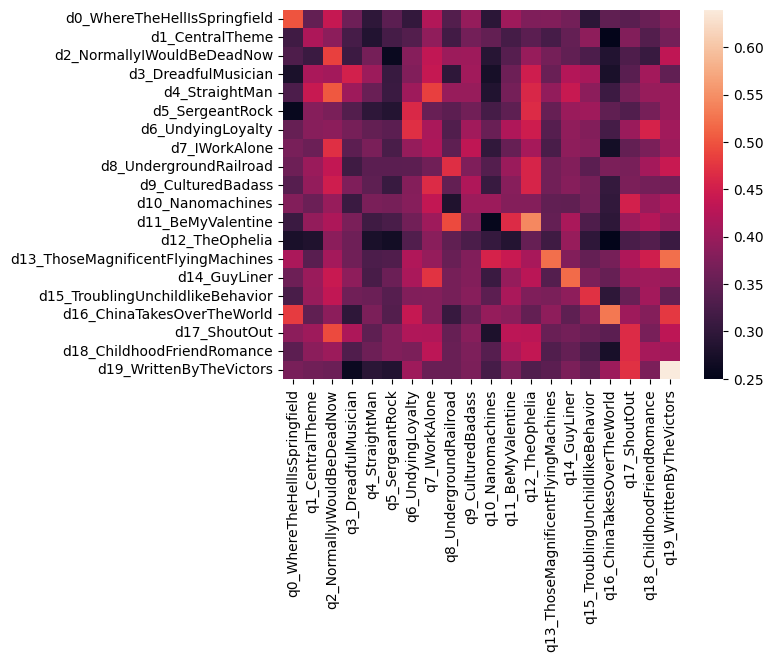

In [151]:
doc_embeddings = model.encode(sample["Example"].tolist())
# query_embeddings = model.encode(queries, prompt="Retrieve similar narratives that describe similar events, characters, and ideas to the following narrative query.")

query_embeddings = model.encode(queries, prompt="Encode similar narrative tropes not in the dataset")

similarities = model.similarity(query_embeddings, doc_embeddings)
# create plot of similarities q_1 ... q_n correspond to doc1 ... docn
q_names = [f"q{i}_{queries_tropes[i]}" for i in range(len(queries))]
d_names = [f"d{i}_{trope_ids[i]}" for i in range(len(doc_embeddings))]

# create a matrix of the similarities
sns.heatmap(similarities, xticklabels=q_names, yticklabels=d_names)

In [137]:
# compare query to max similarity doc for each query
max_similarities = [similarities[i].argmax().item() for i in range(len(similarities))]
pair_values = [f"Best match:{queries_tropes[i]} - {queries_tropes[max_similarities[i]]} Score: {similarities[i][max_similarities[i]]}\nQ: {queries[i]}\nD:{sample["Example"].values[max_similarities[i]]}" for i in range(len(similarities))]
for pair in pair_values:
    print(pair)

Best match:WhereTheHellIsSpringfield - WhereTheHellIsSpringfield Score: 0.5134251713752747
Q:  The location of "Blackbury" is never specifically mentioned, but it is a decaying post-industrial town of the sort whose decay was accelerated in  The '80s  by  Margaret Thatcher . It is usually thought of as being  Oop North   the name is a portmanteau of genuine Northern English placenames  Blackburn, Bury, Dewsbury. Interestingly enough, one of the local papers slso serves a neigghbouring town called  Grimethorpe , suggesting Johnny Maxwell and the Nomes live in the same universe not too far away.
D: There are no hints as to what state, country, or even continent that the story takes place in.  Given that All the Rest has traveled to multiple worlds, it may not even take place on Earth.
Best match:CentralTheme - CentralTheme Score: 0.431730180978775
Q:  Innocence   its value ,  its   various   problems , and  its   inevitable   loss .
D: In the film, prejudice and traditionalism.  Which th

# Testing prompts for In-Context Learning Embedding model
Following code tests the performance of  bge-icl to retrieve similar passages to the query passage.

## Loading model

In [9]:
import torch
import torch.nn.functional as F

from torch import Tensor
from transformers import AutoTokenizer, AutoModel


def last_token_pool(last_hidden_states: Tensor,
                 attention_mask: Tensor) -> Tensor:
    left_padding = (attention_mask[:, -1].sum() == attention_mask.shape[0])
    if left_padding:
        return last_hidden_states[:, -1]
    else:
        sequence_lengths = attention_mask.sum(dim=1) - 1
        batch_size = last_hidden_states.shape[0]
        return last_hidden_states[torch.arange(batch_size, device=last_hidden_states.device), sequence_lengths]


def get_detailed_instruct(task_description: str, query: str) -> str:
    return f'<instruct>{task_description}\n<query>{query}'

def get_detailed_example(task_description: str, query: str, response: str) -> str:
    return f'<instruct>{task_description}\n<query>{query}\n<response>{response}'

def get_new_queries(queries, query_max_len, examples_prefix, tokenizer):
    inputs = tokenizer(
        queries,
        max_length=query_max_len - len(tokenizer('<s>', add_special_tokens=False)['input_ids']) - len(
            tokenizer('\n<response></s>', add_special_tokens=False)['input_ids']),
        return_token_type_ids=False,
        truncation=True,
        return_tensors=None,
        add_special_tokens=False
    )
    prefix_ids = tokenizer(examples_prefix, add_special_tokens=False)['input_ids']
    suffix_ids = tokenizer('\n<response>', add_special_tokens=False)['input_ids']
    new_max_length = (len(prefix_ids) + len(suffix_ids) + query_max_len + 8) // 8 * 8 + 8
    new_queries = tokenizer.batch_decode(inputs['input_ids'])
    for i in range(len(new_queries)):
        new_queries[i] = examples_prefix + new_queries[i] + '\n<response>'
    return new_max_length, new_queries


query_max_len, doc_max_len = 512, 512

tokenizer = AutoTokenizer.from_pretrained('BAAI/bge-en-icl')
model = AutoModel.from_pretrained('BAAI/bge-en-icl')
model.eval()


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

MistralModel(
  (embed_tokens): Embedding(32003, 4096)
  (layers): ModuleList(
    (0-31): 32 x MistralDecoderLayer(
      (self_attn): MistralSdpaAttention(
        (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
        (k_proj): Linear(in_features=4096, out_features=1024, bias=False)
        (v_proj): Linear(in_features=4096, out_features=1024, bias=False)
        (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
        (rotary_emb): MistralRotaryEmbedding()
      )
      (mlp): MistralMLP(
        (gate_proj): Linear(in_features=4096, out_features=14336, bias=False)
        (up_proj): Linear(in_features=4096, out_features=14336, bias=False)
        (down_proj): Linear(in_features=14336, out_features=4096, bias=False)
        (act_fn): SiLU()
      )
      (input_layernorm): MistralRMSNorm((4096,), eps=1e-05)
      (post_attention_layernorm): MistralRMSNorm((4096,), eps=1e-05)
    )
  )
  (norm): MistralRMSNorm((4096,), eps=1e-05)
)

## Loading data

In [18]:
# data_path = TVTROPES_DATA_FOLDER_PATH.parent / "processed" / "100_5_split.csv"
# data = pd.read_csv(data_path)
# loading dataset a creating split 
data = tropes.get_split_for_n_examples_k_classes(20, 5)
data.head(10)

,Unnamed: 0,Title,Trope,Example,trope_id,title_id
238418,240169,InheritanceCycle,ArrogantKungFuGirl,"In Inheritance Cycle, Vanir plays this role, ...",t27670,lit5116
74188,74536,CobraKai,ArrogantKungFuGirl,"Subverted with Johnny Lawrence in Cobra Kai, ...",t27670,tv1154
336948,340410,MasterOfTheFlyingGuillotine,ArrogantKungFuGirl,"Several in Master of the Flying Guillotine, i...",t27670,f7708
298467,301532,KillBill,ArrogantKungFuGirl,"Pai Mei from Kill Bill. Mr. ""Compared to me y...",t27670,f6665
677665,683081,YoungWizards,SomethingForEveryone,The Lone Power from the Young Wizards series ...,t20843,lit15424
25704,25851,BabylonFive,SomethingForEveryone,"In Babylon 5, the Vorlons look to any given p...",t20843,tv402
321444,323875,Nightside,SomethingForEveryone,"Pretty Poison, a succubus from the Nightside ...",t20843,lit7139
313749,316120,NeedfulThings,SomethingForEveryone,"In Clive Barker's Weaveworld, the villain Sha...",t20843,lit7006
29652,29829,AmericanPsycho,ExtraStrengthMasquerade,Serial Killer Patrick Bateman of American Psy...,t07343,lit618
705375,712437,Twilight,ExtraStrengthMasquerade,"Twilight: In the first movie, Edward traverse...",t07343,f15960


In [19]:
task = 'Given a passage of narrative that may contain narrative tropes retrieve narrative passages that contain similar tropes.'
examples = [
  {'instruct': task,
   'query': 'The Scarlet Pimpernel is an early literary example, smuggling French bluebloods from the clutches of the revolutionaries and the embrace of Madam Guillotine.',
   'response': "In Jo Walton's Small Change trilogy, several groups focus on getting Jews and other undesirables out of fascist Europe. When Carmichael is blackmailed into becoming the head of The Watch, a British gestapo, he and a few trustworthy allies found the Inner Watch and use their resources and feared reputation to secretly get innocents to safety."},
  {'instruct': task,
   'query': 'Maureen, who has a powerful voice, but is quite tone deaf. Her attempts at "singing" are mistaken for "yowling" by Bridget and Connie.',
   'response': 'Larklight: Myrtle is one to the cactus creatures, as she drives them away from her with her hymn recitations.'}
]
examples = [get_detailed_example(e['instruct'], e['query'], e['response']) for e in examples]
examples_prefix = '\n\n'.join(examples) + '\n\n' # if there not exists any examples, just set examples_prefix = ''
documents = data["Example"].tolist()
queries_detailed = [get_detailed_instruct(task, q) for q in documents]
new_query_max_len, new_queries = get_new_queries(queries_detailed, query_max_len, examples_prefix, tokenizer)

query_batch_dict = tokenizer(new_queries, max_length=new_query_max_len, padding=True, truncation=True, return_tensors='pt')
doc_batch_dict = tokenizer(documents, max_length=doc_max_len, padding=True, truncation=True, return_tensors='pt')

In [20]:
with torch.no_grad():
    query_outputs = model(**query_batch_dict)
    query_embeddings = last_token_pool(query_outputs.last_hidden_state, query_batch_dict['attention_mask'])
    doc_outputs = model(**doc_batch_dict)
    doc_embeddings = last_token_pool(doc_outputs.last_hidden_state, doc_batch_dict['attention_mask'])
    
# normalize embeddings
query_embeddings = F.normalize(query_embeddings, p=2, dim=1)
doc_embeddings = F.normalize(doc_embeddings, p=2, dim=1)
scores = (query_embeddings @ doc_embeddings.T)
scores

tensor([[0.7243, 0.3933, 0.4076, 0.4415, 0.4117, 0.3965, 0.3554, 0.4059, 0.3285,
         0.3758, 0.3409, 0.3575, 0.3711, 0.3554, 0.3438, 0.2861, 0.2913, 0.2881,
         0.3153, 0.3360],
        [0.4393, 0.8238, 0.4202, 0.4631, 0.3810, 0.3808, 0.3558, 0.3729, 0.3961,
         0.3989, 0.3818, 0.3561, 0.4568, 0.4237, 0.4097, 0.3674, 0.3184, 0.3224,
         0.3271, 0.3598],
        [0.4579, 0.4321, 0.8251, 0.5038, 0.3597, 0.3375, 0.3555, 0.3783, 0.3868,
         0.3449, 0.3456, 0.3163, 0.3817, 0.3681, 0.3738, 0.3159, 0.3118, 0.2939,
         0.3112, 0.3186],
        [0.4942, 0.4482, 0.5078, 0.7219, 0.4131, 0.4142, 0.4144, 0.4068, 0.4102,
         0.4201, 0.3766, 0.3735, 0.4238, 0.3972, 0.3795, 0.3460, 0.3363, 0.2942,
         0.3227, 0.3367],
        [0.4650, 0.3707, 0.3550, 0.4100, 0.7829, 0.5152, 0.4880, 0.4655, 0.4117,
         0.4073, 0.3812, 0.4137, 0.3904, 0.3765, 0.3601, 0.2897, 0.3018, 0.2788,
         0.3336, 0.3666],
        [0.4953, 0.3968, 0.3554, 0.4344, 0.5290, 0.7977, 0.4

In [51]:
labels = data["Trope"].tolist()
print(labels)

['ArrogantKungFuGirl', 'ArrogantKungFuGirl', 'ArrogantKungFuGirl', 'ArrogantKungFuGirl', 'SomethingForEveryone', 'SomethingForEveryone', 'SomethingForEveryone', 'SomethingForEveryone', 'ExtraStrengthMasquerade', 'ExtraStrengthMasquerade', 'ExtraStrengthMasquerade', 'ExtraStrengthMasquerade', 'HanlonsRazor', 'HanlonsRazor', 'HanlonsRazor', 'HanlonsRazor', 'AllGirlsLikePonies', 'AllGirlsLikePonies', 'AllGirlsLikePonies', 'AllGirlsLikePonies']


<Axes: >

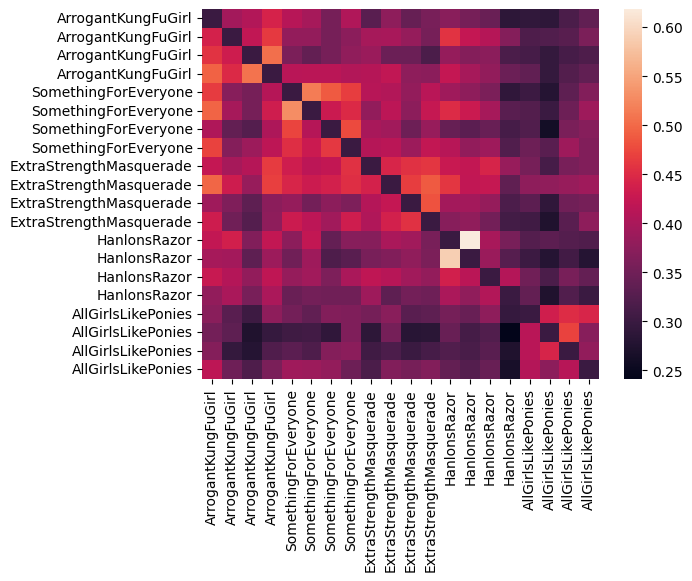

In [72]:
sns.heatmap(scores.fill_diagonal_(0.3), xticklabels=labels, yticklabels=labels)

In [66]:
mean_scores_within_class = scores[:4, :4].fill_diagonal_(float('nan')).nanmean()
print(scores[:4, :4].fill_diagonal_(float('nan')))
mean_score_inter_class = scores[:4, 4:].mean()
print(f"{mean_scores_within_class=}")
print(f"{mean_score_inter_class=}")



tensor([[   nan, 0.3933, 0.4076, 0.4415],
        [0.4393,    nan, 0.4202, 0.4631],
        [0.4579, 0.4321,    nan, 0.5038],
        [0.4942, 0.4482, 0.5078,    nan]])
mean_scores_within_class=tensor(0.4508)
mean_score_inter_class=tensor(0.3615)


In [3]:

def get_class_indices(labels):
    # Dictionary to store indices for each class
    class_indices = {}
    # Populate the dictionary with indices for each class
    for index, class_name in enumerate(labels):
        class_indices.setdefault(class_name, []).append(index)

    # Convert each list of indices to a row in a 2D tensor
    return class_indices



# Function to compute average within-class similarity
def compute_within_class_similarity(tensor, indices):
    # Select rows and columns for the class indices
    sub_tensor = tensor[indices][:, indices]
    # Mask the diagonal (self-similarity) by filling it with NaN
    sub_tensor = sub_tensor.fill_diagonal_(float('nan'))
    # Compute the mean of the non-diagonal values
    return torch.nanmean(sub_tensor).item()

# Function to compute average inter-class similarity
def compute_inter_class_similarity(tensor, class_indices):
    mask = torch.zeros_like(tensor, dtype=torch.bool)  # Boolean mask to select inter-class entries
    classes = list(class_indices.values())
    for i, indices1 in enumerate(classes):
        for indices2 in classes[i + 1:]:
            for idx1 in indices1:
                for idx2 in indices2:
                    mask[idx1, idx2] = True
                    mask[idx2, idx1] = True  # Ensure symmetry
    
    # Select inter-class elements using the mask and compute mean
    inter_class_values = tensor[mask]
    return inter_class_values.mean().item()

In [ ]:
# Compute within-class similarities
within_class_similarities = {class_name: compute_within_class_similarity(scores, indices)
                             for class_name, indices in classes.items()}

# Compute inter-class similarity
inter_class_similarity = compute_inter_class_similarity(scores, classes)

# Output results
print("Within-Class Similarities:", within_class_similarities)
print("Inter-Class Similarity:", inter_class_similarity)

In [74]:

def test_configuration(task, queries, documents, examples, model, tokenizer):
    # Prepare examples
    examples = [get_detailed_example(e['instruct'], e['query'], e['response']) for e in examples]
    examples_prefix = '\n\n'.join(examples) + '\n\n'
    queries_detailed = [get_detailed_instruct(task, q) for q in queries]
    
    # Tokenize queries and documents
    new_query_max_len, new_queries = get_new_queries(queries_detailed, query_max_len, examples_prefix, tokenizer)
    query_batch_dict = tokenizer(new_queries, max_length=new_query_max_len, padding=True, truncation=True, return_tensors='pt')
    doc_batch_dict = tokenizer(documents, max_length=doc_max_len, padding=True, truncation=True, return_tensors='pt')
    
    with torch.no_grad():
        query_outputs = model(**query_batch_dict)
        query_embeddings = last_token_pool(query_outputs.last_hidden_state, query_batch_dict['attention_mask'])
        doc_outputs = model(**doc_batch_dict)
        doc_embeddings = last_token_pool(doc_outputs.last_hidden_state, doc_batch_dict['attention_mask'])
    
    # Normalize embeddings
    query_embeddings = F.normalize(query_embeddings, p=2, dim=1)
    doc_embeddings = F.normalize(doc_embeddings, p=2, dim=1)
    
    # Compute scores
    scores = (query_embeddings @ doc_embeddings.T)
    
    return scores

In [75]:
task2 = 'Represent this sentence for searching relevant passages:\n'
classes = get_class_indices(labels)
scores2 = test_configuration(task2, documents, documents, [], model, tokenizer)
within_class_similarities = {class_name: compute_within_class_similarity(scores2, indices)
                             for class_name, indices in classes.items()}
inter_class_similarity = compute_inter_class_similarity(scores2, classes)
print("Within-Class Similarities:", within_class_similarities)
print("Inter-Class Similarity:", inter_class_similarity)

Within-Class Similarities: {'ArrogantKungFuGirl': 0.44629761576652527, 'SomethingForEveryone': 0.43568089604377747, 'ExtraStrengthMasquerade': 0.4291686713695526, 'HanlonsRazor': 0.4093293845653534, 'AllGirlsLikePonies': 0.4173818528652191}
Inter-Class Similarity: 0.3564070761203766


In [84]:
task3 = 'Narrative trope similarity.\n'
examples3 = [
     {
        'instruct': task3,
        'query': 'What are similar narrative tropes to this: A hero embarks on a journey facing various trials and gaining allies along the way.',
        'response': 'In The Lord of the Rings, Frodo’s journey to destroy the One Ring brings together a fellowship of diverse allies as he faces dangers and personal trials.'
    }
]
questions3 = [f"What are similar narrative tropes to this passage: {d}" for d in documents]
scores3 = test_configuration(task3, questions3, documents, examples3, model, tokenizer)
within_class_similarities = {class_name: compute_within_class_similarity(scores3, indices)
                             for class_name, indices in classes.items()}
inter_class_similarity = compute_inter_class_similarity(scores3, classes)
print("Within-Class Similarities:", within_class_similarities)
print("Inter-Class Similarity:", inter_class_similarity)

Within-Class Similarities: {'ArrogantKungFuGirl': 0.4723488390445709, 'SomethingForEveryone': 0.47389301657676697, 'ExtraStrengthMasquerade': 0.45495089888572693, 'HanlonsRazor': 0.44333526492118835, 'AllGirlsLikePonies': 0.41793057322502136}
Inter-Class Similarity: 0.38152816891670227


<Axes: >

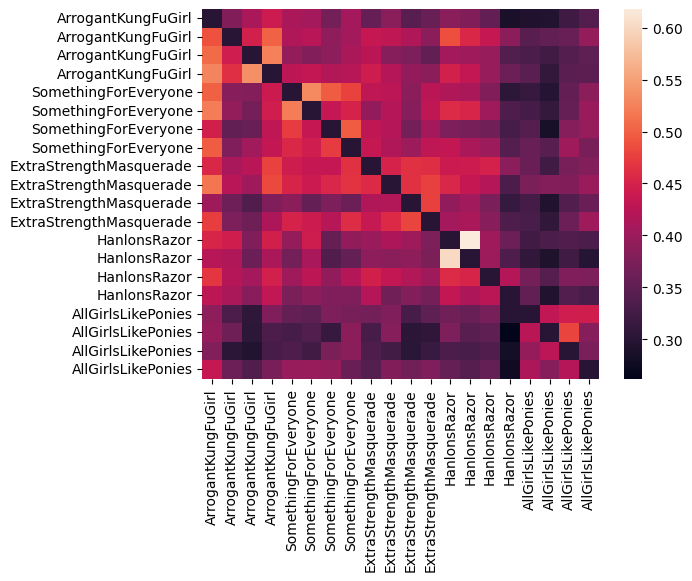

In [85]:
sns.heatmap(scores3.fill_diagonal_(0.3), xticklabels=labels, yticklabels=labels)

# Testing BGEM3 model

In [4]:
import torch
from FlagEmbedding import BGEM3FlagModel

model = BGEM3FlagModel('BAAI/bge-m3',  
                       use_fp16=True) # Setting use_fp16 to True speeds up computation with a slight performance degradation

sample = tropes.get_split_for_n_examples_k_classes(50, 5)
labels = sample["Trope"].tolist()
class_indices = get_class_indices(labels)
documents = sample["Example"].tolist()

Fetching 30 files:   0%|          | 0/30 [00:00<?, ?it/s]

c:\Users\Fergons\Desktop\narana\.venv\Lib\site-packages\FlagEmbedding\BGE_M3\modeling.py:335: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  colbert_state_dict = torch.load(o

In [ ]:
embeddings_1 = model.encode(documents, 
                            max_length=512, # If you don't need such a long length, you can set a smaller value to speed up the encoding process.
                            )['dense_vecs']
embeddings_2 = model.encode(documents, max_length=512)['dense_vecs']
scores_m3 = embeddings_1 @ embeddings_2.T
print(scores_m3)

In [5]:
# Compute within-class similarities
scores_m3 = torch.tensor(scores_m3)
within_class_similarities = {class_name: compute_within_class_similarity(scores_m3, indices)
                             for class_name, indices in class_indices.items()}

# Compute inter-class similarity
inter_class_similarity = compute_inter_class_similarity(scores_m3, class_indices)

# Output results
print("Within-Class Similarities:", within_class_similarities)
print("Inter-Class Similarity:", inter_class_similarity)

Within-Class Similarities: {'Sucksessor': 0.431884765625, 'VillainousCheekbones': 0.4794921875, 'TrackingChip': 0.51513671875, 'WhatWereYouThinking': 0.42626953125, 'InnocentFanserviceGuy': 0.466064453125}
Inter-Class Similarity: 0.388671875


<Axes: >

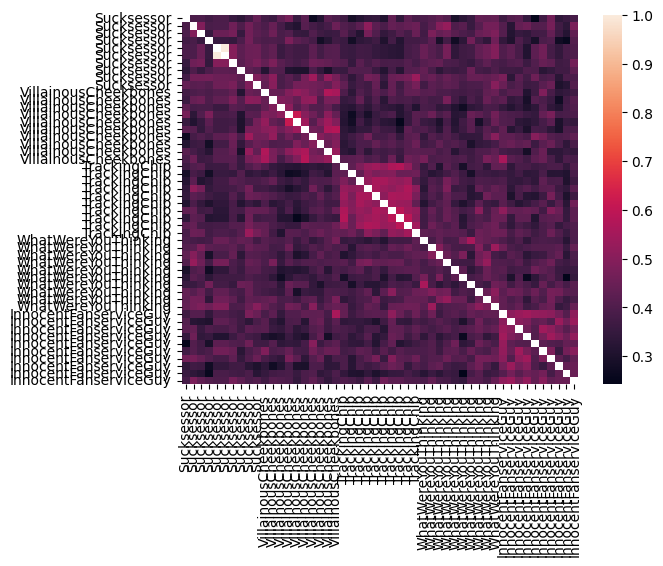

In [6]:
import numpy as np
sns.heatmap(scores_m3, xticklabels=labels, yticklabels=labels, mask=np.eye(scores_m3.shape[0]))

In [24]:
pairs = [[doc1, doc2] for i, doc1 in enumerate(documents) for j, doc2 in enumerate(documents)]
pair_scores = model.compute_score(pairs,
                    batch_size=16,
                     max_passage_length=512,
                          weights_for_different_modes=[1, 0.2, 0.4])


Compute Scores: 100%|██████████| 157/157 [00:10<00:00, 14.80it/s]


In [21]:
pair_scores.keys()

dict_keys(['colbert', 'sparse', 'dense', 'sparse+dense', 'colbert+sparse+dense'])

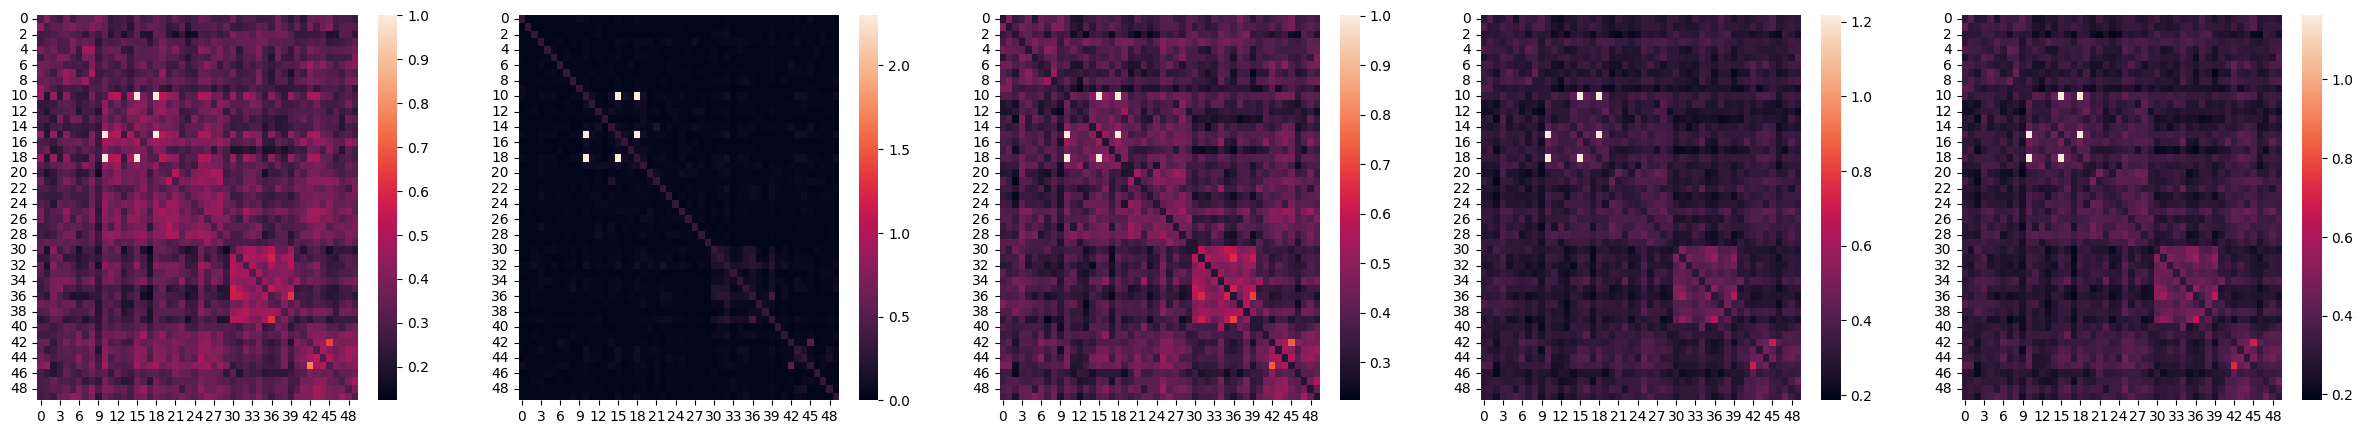

In [25]:
import torch
fig, axes = plt.subplots(nrows=1, ncols=len(pair_scores), figsize=(30, 5))
i = 0
for key, value in pair_scores.items():
    scores = torch.tensor(value).reshape(len(documents), len(documents))
    sns.heatmap(scores.fill_diagonal_(0.3), ax=axes[i])
    i+=1

In [29]:
for key, value in pair_scores.items():
    scores = torch.tensor(value).reshape(len(documents), len(documents))
    within_class_similarities = {class_name: compute_within_class_similarity(scores, indices)
                                 for class_name, indices in class_indices.items()}
    inter_class_similarity = compute_inter_class_similarity(scores, class_indices)
    print(key)
    print("Within-Class Similarities:", within_class_similarities)
    print("Inter-Class Similarity:", inter_class_similarity)
    print()

colbert
Within-Class Similarities: {'XtremelyKoolLetterz': 0.33889085054397583, 'DefeatingTheUndefeatable': 0.44702666997909546, 'GuiltRiddenAccomplice': 0.405450701713562, 'GameShowHost': 0.4518875181674957, 'UptightLovesWild': 0.4082393944263458}
Inter-Class Similarity: 0.32094329595565796

sparse
Within-Class Similarities: {'XtremelyKoolLetterz': 0.017156044021248817, 'DefeatingTheUndefeatable': 0.21187399327754974, 'GuiltRiddenAccomplice': 0.028891414403915405, 'GameShowHost': 0.12010837346315384, 'UptightLovesWild': 0.046177249401807785}
Inter-Class Similarity: 0.02437087893486023

dense
Within-Class Similarities: {'XtremelyKoolLetterz': 0.40313857793807983, 'DefeatingTheUndefeatable': 0.4771592915058136, 'GuiltRiddenAccomplice': 0.44046223163604736, 'GameShowHost': 0.5173231363296509, 'UptightLovesWild': 0.45425888895988464}
Inter-Class Similarity: 0.3665925860404968

sparse+dense
Within-Class Similarities: {'XtremelyKoolLetterz': 0.33880817890167236, 'DefeatingTheUndefeatable': 